<a href="https://colab.research.google.com/github/orinizri/ML_AI_colab_notebooks/blob/main/Pre_trained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# !pip3 install torch
# !pip3 install torchvision

In [ ]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms, models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# !git clone http://github.com/jaddoescad/ants_and_bees.git

In [ ]:
# !ls ants_and_bees/train/ants

In [ ]:
transform_train = transforms.Compose([transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ColorJitter(brightness=1, contrast=1, saturation=1),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5))
])
transform = transforms.Compose([transforms.Resize((224, 224)), transforms.ToTensor(), transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)) ])
training_dataset = datasets.ImageFolder('ants_and_bees/train', transform=transform_train)
validation_dataset = datasets.ImageFolder('ants_and_bees/val', transform=transform)

print(len(training_dataset))
print(len(validation_dataset))

244
153


In [ ]:
def image_convert(tensor):
    # Clone the tensor and detach it from the computation graph to avoid affecting gradients
    image = tensor.cpu().clone().detach().numpy()
    # Transpose from (C, H, W) to (H, W, C) to match standard image format
    image = image.transpose(1, 2, 0)
    # Denormalize the image (assuming it was normalized with mean=0.5 and std=0.5)
    image = image * np.array((0.5, 0.5, 0.5)) + np.array((0.5, 0.5, 0.5))
    # Clip values to ensure they're between 0 and 1, as required for images
    image = np.clip(image, 0, 1)
    return image

classes = ('ant', 'bee')

In [ ]:
training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=20, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=20, shuffle=False)

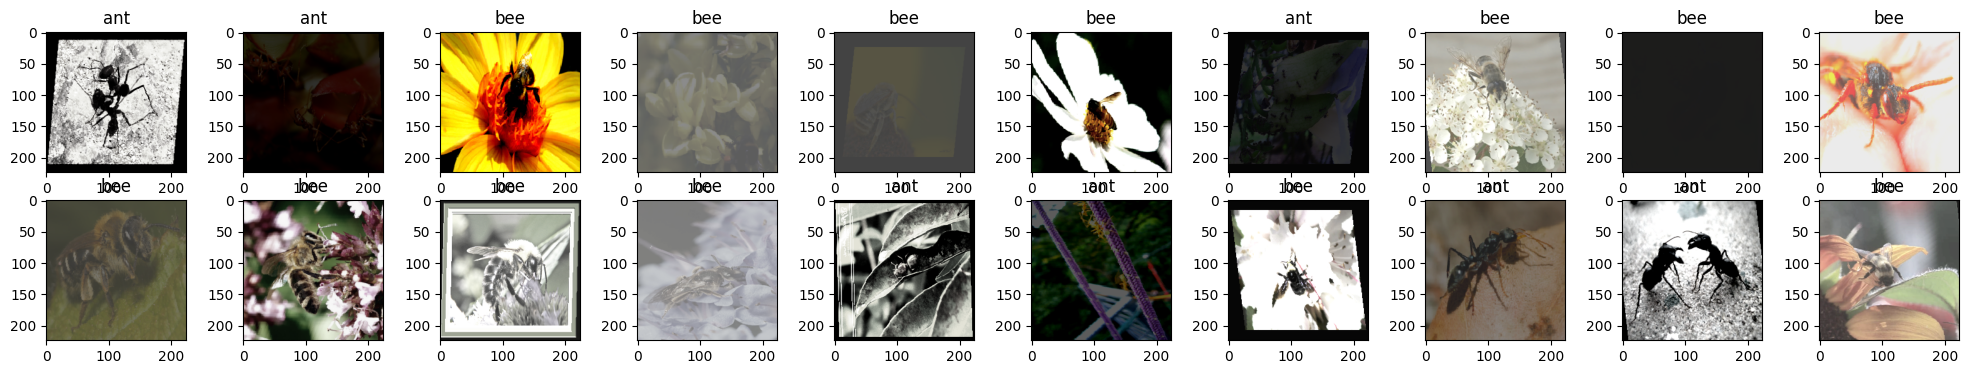

In [ ]:
data_iterator = iter(training_loader)
images, labels = next(data_iterator)
fig = plt.figure(figsize=(25,4))

for i in np.arange(20):
  ax = fig.add_subplot(2, 10, i + 1)
  plt.imshow(image_convert(images[i]))
  ax.set_title(classes[labels[i].item()])


In [ ]:
model = models.alexnet(pretrained=True)
model

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
for param in model.features.parameters():
  param.requires_grad = False

In [ ]:
n_inputs = model.classifier[6].in_features
last_layer = nn.Linear(n_inputs, len(classes))
model.classifier[6] = last_layer

model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
epochs = 8
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []
for e in range(epochs):
  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    outputs = model(inputs)
    loss = criterion(outputs, labels)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)
  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
          val_outputs = model(val_inputs)
          val_loss = criterion(val_outputs, val_labels)
          _, val_preds = torch.max(outputs, 1)
          val_running_loss += val_loss.item()
          val_running_corrects += torch.sum(val_preds == labels.data)



    epoch_loss = running_loss / len(training_loader.dataset)
    epoch_acc = running_corrects.float() / len(training_loader.dataset)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)
    val_epoch_loss = val_running_loss / len(validation_loader.dataset)
    val_epoch_acc = val_running_corrects.float() / len(validation_loader.dataset)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)
    print('epoch:', e + 1)
    print('training loss: {:.4f}, accuracy: {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('validation loss: {:.4f}, accuracy: {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))


epoch: 1
training loss: 0.0185, accuracy: 0.7992
validation loss: 0.0268, accuracy: 0.2092
epoch: 2
training loss: 0.0206, accuracy: 0.8361
validation loss: 0.0265, accuracy: 0.1569
epoch: 3
training loss: 0.0178, accuracy: 0.8402
validation loss: 0.0393, accuracy: 0.2092
epoch: 4
training loss: 0.0195, accuracy: 0.8484
validation loss: 0.0283, accuracy: 0.2092
epoch: 5
training loss: 0.0125, accuracy: 0.8689
validation loss: 0.0272, accuracy: 0.2092
epoch: 6
training loss: 0.0137, accuracy: 0.8730
validation loss: 0.0287, accuracy: 0.2092
epoch: 7
training loss: 0.0161, accuracy: 0.8279
validation loss: 0.0242, accuracy: 0.2092
epoch: 8
training loss: 0.0129, accuracy: 0.9016
validation loss: 0.0245, accuracy: 0.2092


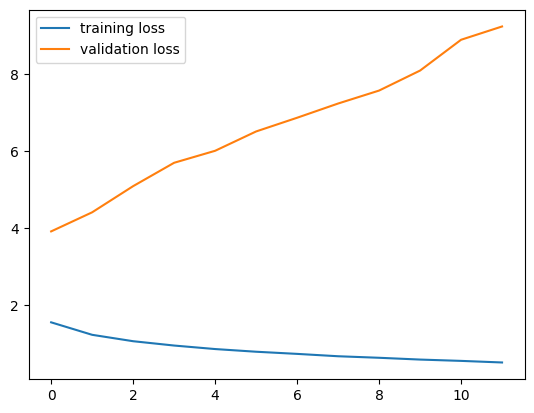

In [ ]:
plt.plot(running_loss_history, label='training loss')
plt.plot(val_running_loss_history, label='validation loss')
plt.legend()

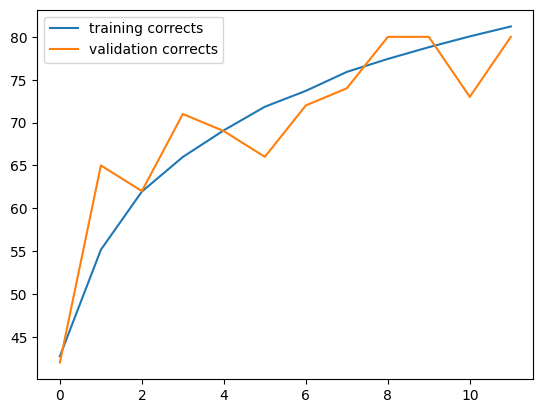

In [ ]:
running_corrects_history_Cpu = torch._to_cpu(running_corrects_history)
plt.plot(running_corrects_history, label='training corrects')
plt.plot(val_running_corrects_history, label='validation corrects')
plt.legend()

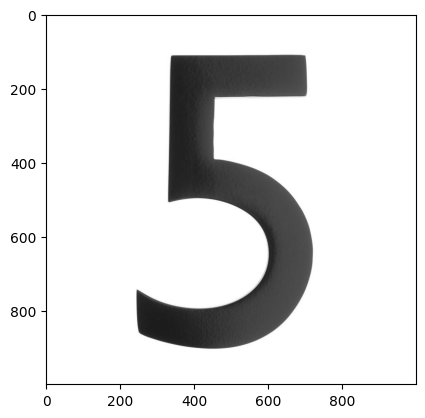

In [ ]:
import requests
from PIL import Image
import PIL

url = 'https://images.homedepot-static.com/productImages/007164ea-d47e-4f66-8d8c-fd9f621984a2/svn/architectural-mailboxes-house-letters-numbers-3585b-5-64_1000.jpg'
response = requests.get(url, stream = True)
img = Image.open(response.raw)
plt.imshow(img)

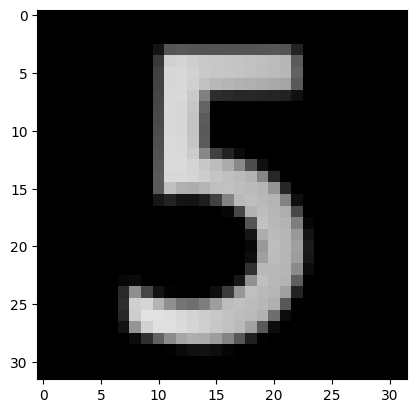

In [ ]:
# Preprocess black background and white number
img = PIL.ImageOps.invert(img)
img = transform(img)
plt.imshow(image_convert(img))

In [ ]:
images = img
output = model(images)
_, pred = torch.max(output, 1)
print(classes[pred.item()])

automobile


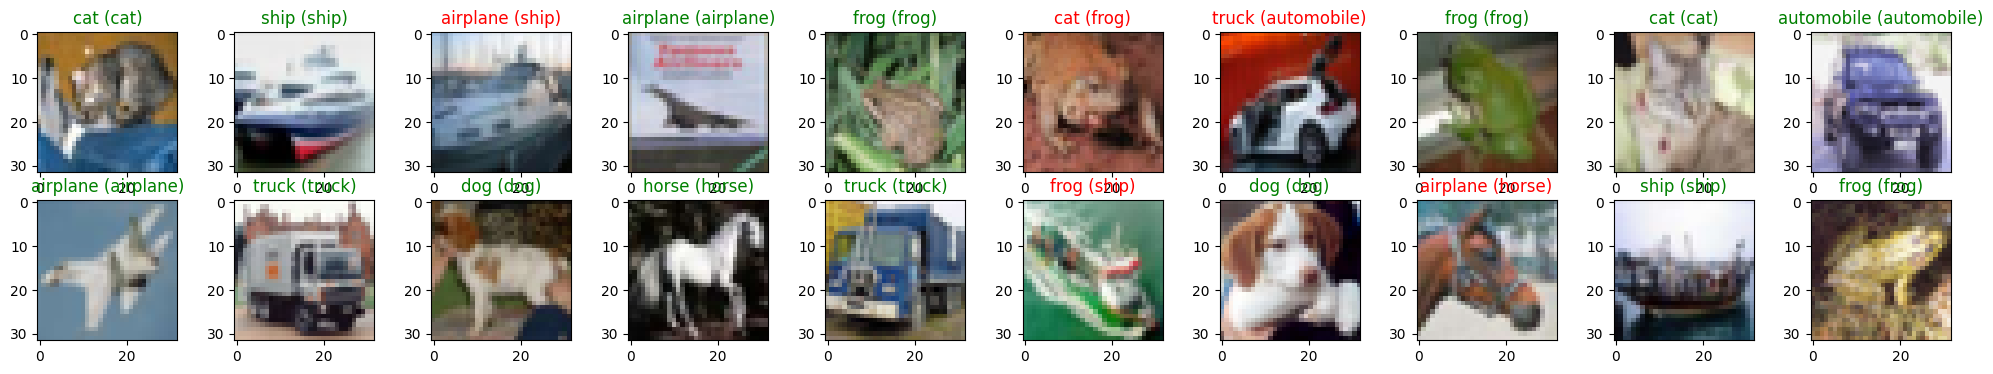

In [ ]:
data_iterator = iter(validation_loader)
images, labels = next(data_iterator)
images = images
labels = labels
fig = plt.figure(figsize=(25,4))
outputs = model(images)
_, preds = torch.max(outputs, 1)
for i in np.arange(20):
  ax = fig.add_subplot(2, 10, i + 1)
  plt.imshow(image_convert(images[i]))
  ax.set_title('{} ({})'.format(str(classes[preds[i].item()]), str(classes[labels[i].item()])), color=("green" if preds[i] == labels[i] else "red"))